# Lecture - 02

## Measures of central tendency
To calculate measures of central tendency (mean, median, and mode) in Python, you can use the statistics module, which is part of the Python Standard Library. 

In [1]:
import statistics

# Sample data
data = [1, 2, 2, 3, 4, 4, 4, 5, 6, 7, 8, 9]

# Calculate mean
mean = statistics.mean(data)
print(f'Mean: {mean}')

# Calculate median
median = statistics.median(data)
print(f'Median: {median}')

# Calculate mode
mode = statistics.mode(data)
print(f'Mode: {mode}')

Mean: 4.583333333333333
Median: 4.0
Mode: 4


If you need more advanced statistical analysis, you can use the numpy library:

In [2]:
import numpy as np
from scipy import stats

# Sample data
data = np.array([1, 2, 2, 3, 4, 4, 4, 5, 6, 7, 8, 9])

# Calculate mean
mean = np.mean(data)
print(f'Mean: {mean}')

# Calculate median
median = np.median(data)
print(f'Median: {median}')

# Calculate mode
mode = stats.mode(data)
print(f'Mode: {mode}')


Mean: 4.583333333333333
Median: 4.0
Mode: ModeResult(mode=4, count=3)


## Measures of dispersion


In [3]:
import statistics

# Sample data
data = [1, 2, 2, 3, 4, 4, 4, 5, 6, 7, 8, 9]

# Calculate range
range_value = max(data) - min(data)
print(f'Range: {range_value}')

# Calculate variance
variance = statistics.variance(data)
print(f'Variance: {variance}')

# Calculate standard deviation
std_dev = statistics.stdev(data)
print(f'Standard Deviation: {std_dev}')

Range: 8
Variance: 6.265151515151516
Standard Deviation: 2.5030284687057627


Using numpy

In [4]:
import numpy as np

# Sample data
data = np.array([1, 2, 2, 3, 4, 4, 4, 5, 6, 7, 8, 9])

# Calculate range
range_value = np.ptp(data)
print(f'Range: {range_value}')

# Calculate variance
variance = np.var(data, ddof=1)  # ddof=1 for sample variance
print(f'Variance: {variance}')

# Calculate standard deviation
std_dev = np.std(data, ddof=1)  # ddof=1 for sample standard deviation
print(f'Standard Deviation: {std_dev}')

Range: 8
Variance: 6.265151515151516
Standard Deviation: 2.5030284687057627


### Degrees of Freedom (df)

Degrees of freedom refer to the number of values in a calculation that are free to vary. In statistics, when estimating population parameters (like the population variance or standard deviation) from a sample, you use degrees of freedom to account for the fact that the sample is only an estimate of the population.
ddof in Practice

   - For Sample Statistics: When calculating sample variance or standard deviation, you typically set ddof=1. This adjusts the divisor to n-1, where n is the number of observations. This is known as Bessel's correction and it provides an unbiased estimator of the population variance and standard deviation.
   - For Population Statistics: If you are calculating the population variance or standard deviation, you set ddof=0. This means the divisor is n, the number of observations.

## percentile and quartile 

In [5]:
import numpy as np

# Sample data
data = np.array([1, 2, 2, 3, 4, 4, 4, 5, 6, 7, 8, 9])

# Calculate percentiles
percentile_25 = np.percentile(data, 25)  # 25th percentile
percentile_50 = np.percentile(data, 50)  # 50th percentile (median)
percentile_75 = np.percentile(data, 75)  # 75th percentile

print(f'25th Percentile: {percentile_25}')
print(f'50th Percentile (Median): {percentile_50}')
print(f'75th Percentile: {percentile_75}')

# Calculate quartiles
q1 = np.percentile(data, 25)  # First quartile (Q1)
q2 = np.percentile(data, 50)  # Second quartile (Q2), same as the median
q3 = np.percentile(data, 75)  # Third quartile (Q3)

print(f'First Quartile (Q1): {q1}')
print(f'Second Quartile (Q2): {q2}')
print(f'Third Quartile (Q3): {q3}')

25th Percentile: 2.75
50th Percentile (Median): 4.0
75th Percentile: 6.25
First Quartile (Q1): 2.75
Second Quartile (Q2): 4.0
Third Quartile (Q3): 6.25


In [6]:
# Calculate quartiles using scipy
from scipy import stats
quartiles = stats.mstats.mquantiles(data, prob=[0.25, 0.5, 0.75])

print(f'First Quartile (Q1): {quartiles[0]}')
print(f'Second Quartile (Q2): {quartiles[1]}')
print(f'Third Quartile (Q3): {quartiles[2]}')

First Quartile (Q1): 2.45
Second Quartile (Q2): 4.0
Third Quartile (Q3): 6.550000000000001


## Five-number summary

In [7]:
import numpy as np

# Sample data
data = np.array([1, 2, 2, 3, 4, 4, 4, 5, 6, 7, 8, 9])

# Calculate the five-number summary
min_value = np.min(data)
q1 = np.percentile(data, 25)
median = np.median(data)
q3 = np.percentile(data, 75)
max_value = np.max(data)

print(f'Minimum: {min_value}')
print(f'First Quartile (Q1): {q1}')
print(f'Median (Q2): {median}')
print(f'Third Quartile (Q3): {q3}')
print(f'Maximum: {max_value}')

Minimum: 1
First Quartile (Q1): 2.75
Median (Q2): 4.0
Third Quartile (Q3): 6.25
Maximum: 9


Using pandas for a more detailed summary

You can also use the pandas library to quickly get a descriptive summary of the data, including the five-number summary:

In [8]:
import pandas as pd

# Sample data
data = [1, 2, 2, 3, 4, 4, 4, 5, 6, 7, 8, 9]

# Convert to a pandas Series
data_series = pd.Series(data)

# Get descriptive statistics
summary = data_series.describe(percentiles=[.25, .5, .75])

print(summary)

count    12.000000
mean      4.583333
std       2.503028
min       1.000000
25%       2.750000
50%       4.000000
75%       6.250000
max       9.000000
dtype: float64


### five-number summary and use it to identify and remove outliers
To calculate the five-number summary and use it to identify and remove outliers, you can use the Interquartile Range (IQR). The IQR is the range between the first quartile (Q1) and the third quartile (Q3). Outliers are typically defined as data points that lie below the lower fence or above the upper fence.

In [9]:
import numpy as np

# Sample data
data = np.array([1, 2, 2, 3, 4, 4, 4, 5, 6, 7, 8, 9, 100])  # Added an outlier for demonstration

# Calculate the five-number summary
min_value = np.min(data)
q1 = np.percentile(data, 25)
median = np.median(data)
q3 = np.percentile(data, 75)
max_value = np.max(data)

# Calculate IQR
iqr = q3 - q1

# Calculate fences for outliers
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

# Identify and remove outliers
filtered_data = data[(data >= lower_fence) & (data <= upper_fence)]

# Recalculate the five-number summary without outliers
min_value_filtered = np.min(filtered_data)
q1_filtered = np.percentile(filtered_data, 25)
median_filtered = np.median(filtered_data)
q3_filtered = np.percentile(filtered_data, 75)
max_value_filtered = np.max(filtered_data)

print("Original Data:")
print(f'Minimum: {min_value}')
print(f'First Quartile (Q1): {q1}')
print(f'Median (Q2): {median}')
print(f'Third Quartile (Q3): {q3}')
print(f'Maximum: {max_value}')
print(f'IQR: {iqr}')
print(f'Lower Fence: {lower_fence}')
print(f'Upper Fence: {upper_fence}')

print("\nFiltered Data (without outliers):")
print(f'Minimum: {min_value_filtered}')
print(f'First Quartile (Q1): {q1_filtered}')
print(f'Median (Q2): {median_filtered}')
print(f'Third Quartile (Q3): {q3_filtered}')
print(f'Maximum: {max_value_filtered}')

Original Data:
Minimum: 1
First Quartile (Q1): 3.0
Median (Q2): 4.0
Third Quartile (Q3): 7.0
Maximum: 100
IQR: 4.0
Lower Fence: -3.0
Upper Fence: 13.0

Filtered Data (without outliers):
Minimum: 1
First Quartile (Q1): 2.75
Median (Q2): 4.0
Third Quartile (Q3): 6.25
Maximum: 9


To visualize the five-number summary and identify outliers, you can use a box plot. The matplotlib library in Python is commonly used for this purpose. Here's how you can create a box plot for the dataset, including the removal of outliers based on the IQR method.

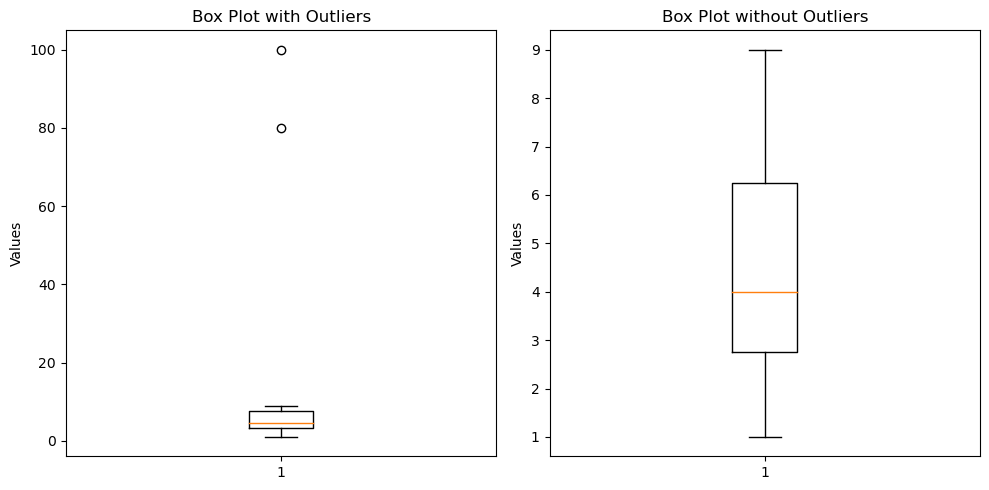

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = np.array([1, 2, 2, 3, 4, 4, 4, 5, 6, 7, 8, 9, 80,100])  # Added an outlier for demonstration

# Calculate the five-number summary
min_value = np.min(data)
q1 = np.percentile(data, 25)
median = np.median(data)
q3 = np.percentile(data, 75)
max_value = np.max(data)

# Calculate IQR
iqr = q3 - q1

# Calculate fences for outliers
lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

# Identify and remove outliers
filtered_data = data[(data >= lower_fence) & (data <= upper_fence)]

# Box plot before removing outliers
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(data)
plt.title('Box Plot with Outliers')
plt.ylabel('Values')

# Box plot after removing outliers
plt.subplot(1, 2, 2)
plt.boxplot(filtered_data)
plt.title('Box Plot without Outliers')
plt.ylabel('Values')

plt.tight_layout()
plt.show()

#### Prepared By,
Ahamed Basith